# Overview

The purpose of this notebook is to find if there is any trend of the average track durations of the "Billboard Hot-100" for the years 2006 to 2024. 

The Data section reads in 'columns_final_df.json' into a pandas dataframe. It is then cleaned and a scatterplot is displayed with a regression line and its correlation coefficient.

The Analysis section gives some insight of these findings.

# Data

In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Read in .json file as pandas DataFrame
data_file = Path('../data/columns_final_df.json')
df = pd.read_json(data_file)
df.head()

,Year,Rank,Title,Artist,First Feature,Second Feature,Genres,Duration,Popularity,Spotify ID
0,2006,1,Bad Day,Daniel Powter,None,None,,3:53,71.0,0mUyMawtxj1CJ76kn9gIZK
1,2006,2,Temperature,Sean Paul,None,None,,3:38,78.0,0k2GOhqsrxDTAbFFSdNJjT
2,2006,3,Promiscuous,Nelly Furtado,Timbaland,None,,4:02,83.0,2gam98EZKrF9XuOkU13ApN
3,2006,4,You're Beautiful,James Blunt,None,None,,3:29,73.0,0vg4WnUWvze6pBOJDTq99k
4,2006,5,Hips Don't Lie (feat. Wyclef Jean),Shakira,Wyclef Jean,None,,3:38,84.0,3ZFTkvIE7kyPt6Nu3PEa7V


In [3]:
# Extract only columns of interest
df = df[['Year', 'Title', 'Artist', 'Duration']]
df.head()

,Year,Title,Artist,Duration
0,2006,Bad Day,Daniel Powter,3:53
1,2006,Temperature,Sean Paul,3:38
2,2006,Promiscuous,Nelly Furtado,4:02
3,2006,You're Beautiful,James Blunt,3:29
4,2006,Hips Don't Lie (feat. Wyclef Jean),Shakira,3:38


In [5]:
# Turn Duration column ("minute:second" format) to TotalSeconds column (seconds format)
df[['DurMin', 'DurSec']] = df['Duration'].str.split(':', expand=True)
df['DurMin'] = df['DurMin'].astype(int)
df['DurSec'] = df['DurSec'].astype(int)
df['TotalSeconds'] = (df['DurMin']*60) + df['DurSec']
df.head()

,Year,Title,Artist,Duration,DurMin,DurSec,TotalSeconds
0,2006,Bad Day,Daniel Powter,3:53,3,53,233
1,2006,Temperature,Sean Paul,3:38,3,38,218
2,2006,Promiscuous,Nelly Furtado,4:02,4,2,242
3,2006,You're Beautiful,James Blunt,3:29,3,29,209
4,2006,Hips Don't Lie (feat. Wyclef Jean),Shakira,3:38,3,38,218


In [6]:
# Display average duration of songs grouped by year
grouped_df = df.groupby("Year")['TotalSeconds'].mean()
grouped_df

Year
2006    234.90
2007    244.09
2008    235.85
2009    240.40
2010    229.93
2011    233.67
2012    222.76
2013    230.93
2014    231.62
2015    221.04
2016    221.81
2017    222.61
2018    212.19
2019    192.77
2020    196.39
2021    193.82
2022    199.07
2023    196.78
2024    200.80
Name: TotalSeconds, dtype: float64

In [59]:
def lin_reg(x, y):
    # Find slope and intercept of regression line, set linear
    b, a = np.polyfit(x, y, deg=1)
    
    # Plot regression line
    xseq = np.linspace(min(x), max(x))
    plt.plot(xseq, a + b * xseq, color="r")

    # Calculate and print correlation coefficient
    r = np.corrcoef(x, y)
    r_2 = '{0:.2f}'.format(r[0, 1]**2)
    print(f'The r^2-value is: {r_2}')

The r^2-value is: 0.84


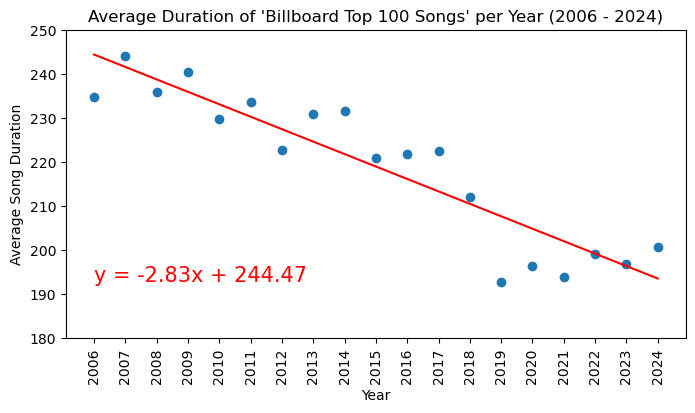

In [60]:
# Set x,y data to variable names
years = grouped_df.index
durations = grouped_df.values

# Set figure size
plt.figure(figsize=(8, 4))
# sns.regplot(x=grouped_df.index, y=grouped_df.values, scatter=True, color="blue", line_kws={"color": "red"}, ci=None)

# # Setz x-axis features
unique, index = np.unique(years, return_inverse=True)
plt.xticks(range(len(unique)), unique)
plt.xticks(rotation=90)
plt.xlabel('Year')

# Set y-axis features
plt.ylabel('Average Song Duration')
plt.ylim(180, 250)

# Graph Features
plt.title("Average Duration of 'Billboard Top 100 Songs' per Year (2006 - 2024)")

# Plot the graph
plt.scatter(index, durations)

# Plot Regression Line
lin_reg(index, durations)

# Display Graph
plt.show()

# Analysis

The average track duration of the 'Billboard Top 100 Songs' and year have a significant relationship. The linear regression shows that song duration decreased by about 2.83 minutes on average every year between 2006 and 2024. This regression line has a correlation coefficient (r^2) of 0.84 which is quite significant for our purposes. 